In [1]:
import pandas as pd
from arima import ModelARIMA, TrainData

In [2]:
df = pd.read_csv("../EDA/gen/historical_data_1d.csv", sep=';')
df["begin"] = pd.to_datetime(df["begin"])
df_sber = df[df['name'] == 'SBER']
df_sber = df_sber.loc[df_sber['begin'] >= df_sber['begin'].max() - pd.Timedelta(days=252)]

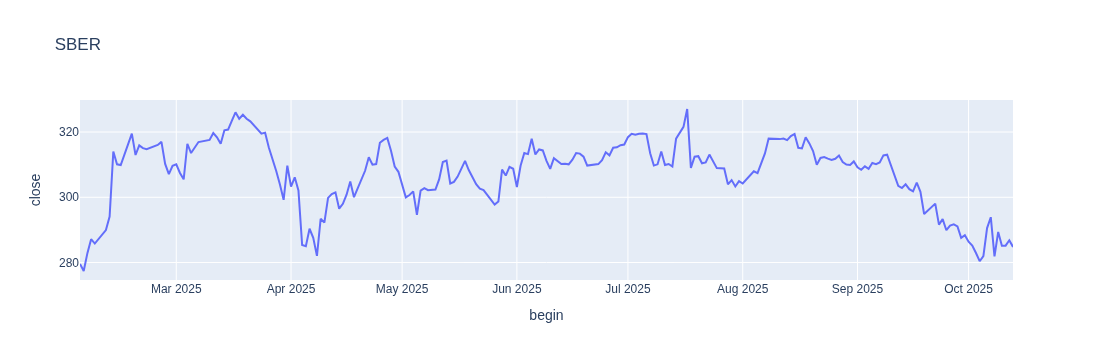

In [3]:
import plotly.express as px

fig = px.line(df_sber, x="begin", y="close", title='SBER')
fig.show()

In [4]:
arima_0 = ModelARIMA()

TEST_SIZE = 20
train_1 = TrainData(
    train_x=df_sber['begin'][:-TEST_SIZE],
    train_y=df_sber['close'][:-TEST_SIZE],
    test_x=df_sber['begin'][-TEST_SIZE:],
    test_y=df_sber['close'][-TEST_SIZE:]
)

In [7]:
import warnings
warnings.filterwarnings("ignore")

arima_0.train(train_1)

ARIMA: Train size = 208, Test size = 20
ARIMA: Best params found: (0, 1, 1) x (1, 1, 1, 7) AIC=1082.0084113826856
ARIMA: Start fit
ARIMA: Fit finished


ARIMA: Forecasting next 20 steps...


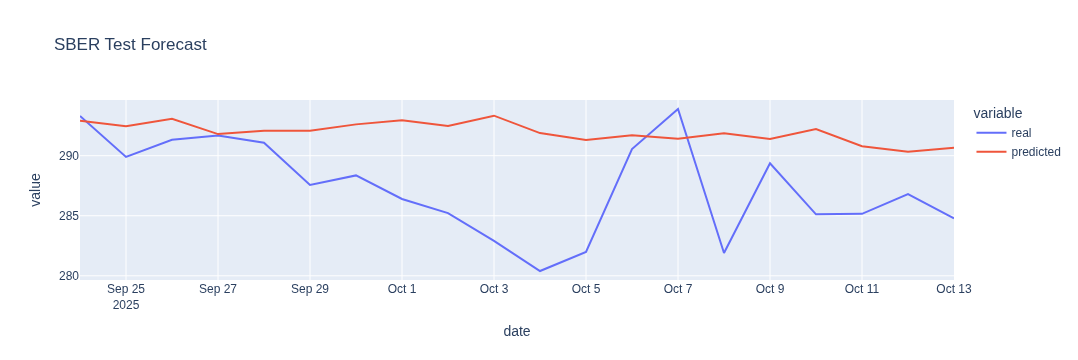

In [13]:
import plotly.express as px
import pandas as pd

future_pred = arima_0.predict(steps=20)
df_plot = pd.DataFrame({
    "date": df_sber["begin"].iloc[-TEST_SIZE:],
    "real": df_sber['close'][-TEST_SIZE:],
    "predicted": future_pred.values
})

px.line(df_plot, x="date", y=["real", "predicted"],
        title="SBER Test Forecast").show()

In [15]:
future_pred = arima_0.predict(steps=30)
print(future_pred)

ARIMA: Forecasting next 30 steps...
208    292.907554
209    292.448427
210    293.067073
211    291.799564
212    292.070272
213    292.081134
214    292.610144
215    292.955132
216    292.469972
217    293.333938
218    291.883443
219    291.316045
220    291.703975
221    291.410401
222    291.868842
223    291.386751
224    292.221802
225    290.792875
226    290.324260
227    290.667747
228    290.471127
229    290.916196
230    290.433743
231    291.272202
232    289.840733
233    289.360476
234    289.709200
235    289.501153
236    289.947799
237    289.465388
Name: predicted_mean, dtype: float64
